In [1]:
# @title Setup
from google.cloud import bigquery
from google.colab import data_table
import bigframes.pandas as bpd

project = 'amazing-sunset-472417-a3' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=amazing-sunset-472417-a3:US:bquxjob_ca0ce66_1997cb07ee0)
back to BigQuery to edit the query within the BigQuery user interface.

In [3]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_ca0ce66_1997cb07ee0') # Job ID inserted based on the query results selected to explore
print(job.query)

SELECT
    e.event_date,
    e.event_timestamp,
    e.event_name,
    e.user_pseudo_id,
    MAX(IF(ep.key = 'page_location', ep.value.string_value, NULL)) AS page_location,
    MAX(IF(ep.key = 'page_title',    ep.value.string_value, NULL)) AS page_title,
    MAX(IF(ep.key = 'ga_session_id', CAST(ep.value.int_value AS INT64), NULL)) AS ga_session_id,
    MAX(IF(ep.key = 'session_engaged', CAST(ep.value.int_value AS INT64), NULL)) AS session_engaged,
    MAX(IF(ep.key = 'source',        ep.value.string_value, NULL)) AS source,
    MAX(IF(ep.key = 'medium',        ep.value.string_value, NULL)) AS medium,
    MAX(IF(ep.key = 'campaign',      ep.value.string_value, NULL)) AS campaign,
    MAX(IF(ep.key = 'value',         ep.value.float_value, NULL)) AS value_param,
    MAX(IF(ep.key = 'currency',      ep.value.string_value, NULL)) AS currency
  FROM `bigquery-public-data.ga4_obfuscated_sample_ecommerce.events_*` e
  CROSS JOIN UNNEST(e.event_params) AS ep
  GROUP BY 1,2,3,4
  ORDER BY event

# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API. The read_gbq_table [method](https://cloud.google.com/python/docs/reference/bigframes/latest/bigframes.pandas#bigframes_pandas_read_gbq_function) turns a BigQuery table into the BigFrames DataFrame.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [4]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_ca0ce66_1997cb07ee0') # Job ID inserted based on the query results selected to explore
destination = job.destination

# Load data from a BigQuery table using BigFrames DataFrames:
bq_df = bpd.read_gbq(f"{destination.project}.{destination.dataset_id}.{destination.table_id}")
bq_df

,event_date,event_timestamp,event_name,user_pseudo_id,page_location,page_title,ga_session_id,session_engaged,source,medium,campaign,value_param,currency
0,20201115,1605479369177002,user_engagement,41275462.3805621158,https://shop.googlemerchandisestore.com/Google...,Apparel | Google Merchandise Store,5405915266,<NA>,google,organic,(organic),<NA>,<NA>
1,20201206,1607251257652958,view_item,3562946.9800700991,https://shop.googlemerchandisestore.com/asearc...,Store search results,2740292678,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,20201218,1608287830569059,select_item,5546483263.2515983738,https://shop.googlemerchandisestore.com/store....,Home,5707741341,<NA>,shop.googlemerchandisestore.com,referral,(referral),<NA>,<NA>
3,20201201,1606802526829827,page_view,53157350.5213221751,https://shop.googlemerchandisestore.com/Google...,Campus Collection | Google Merchandise Store,5754097156,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,20210126,1611659579128522,first_visit,6090739.7026816481,https://shop.googlemerchandisestore.com/Google...,Google Mural Sticker Sheet,2479514230,1,<NA>,<NA>,<NA>,<NA>,<NA>
5,20201228,1609190877118314,session_start,7506265.4265757290,https://googlemerchandisestore.com/,Google Online Store,7665742671,1,<NA>,<NA>,<NA>,<NA>,<NA>
6,20201108,1604863266781913,user_engagement,8887611.3475296502,https://shop.googlemerchandisestore.com/Google...,Eco-Friendly | Google Merchandise Store,7385514731,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
7,20201214,1607956586408906,scroll,6948012.9754264018,https://shop.googlemerchandisestore.com/Google...,Men's / Unisex | Apparel | Google Merchandise ...,3315126743,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
8,20201229,1609240695546517,page_view,2867337.3389060650,https://shop.googlemerchandisestore.com/,Home,1727253086,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
9,20210129,1611937800752544,scroll,5706715.6852183826,https://shop.googlemerchandisestore.com/basket...,Shopping Cart,9155340561,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


## Show descriptive statistics using describe()
Use the ```DataFrame.describe()```
[method](https://cloud.google.com/python/docs/reference/bigframes/latest/bigframes.dataframe.DataFrame#bigframes_dataframe_DataFrame_describe)
to generate descriptive statistics. Descriptive statistics include those that
summarize the central tendency, dispersion and shape of a dataset’s
distribution, excluding ```NaN``` values. You may also use other Python methods
to interact with your data.

In [5]:
# Generate descriptive statistics.
bq_df.describe()

,event_timestamp,ga_session_id,session_engaged,value_param
count,4295584.0,4295584.0,313391.0,0.0
mean,1607910992019994.25,4990128390.405848,1.0,<NA>
std,2210056381821.869141,2879453023.951997,0.0,<NA>
min,1604188804579566.0,1205.0,1.0,<NA>
25%,1606136818785092.0,2538377597.0,1.0,<NA>
50%,1607600205787972.0,4994396494.0,1.0,<NA>
75%,1609856344355329.0,7473429370.0,1.0,<NA>
max,1612137595412363.0,9999997129.0,1.0,<NA>


In [6]:
# Convert BigQuery DataFrame to pandas DataFrame.
pandas_df = bq_df.to_pandas()

In [7]:
pandas_df

,event_date,event_timestamp,event_name,user_pseudo_id,page_location,page_title,ga_session_id,session_engaged,source,medium,campaign,value_param,currency
0,20201115,1605479369177002,user_engagement,41275462.3805621158,https://shop.googlemerchandisestore.com/Google...,Apparel | Google Merchandise Store,5405915266,<NA>,google,organic,(organic),<NA>,<NA>
1,20201206,1607251257652958,view_item,3562946.9800700991,https://shop.googlemerchandisestore.com/asearc...,Store search results,2740292678,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,20201218,1608287830569059,select_item,5546483263.2515983738,https://shop.googlemerchandisestore.com/store....,Home,5707741341,<NA>,shop.googlemerchandisestore.com,referral,(referral),<NA>,<NA>
3,20201201,1606802526829827,page_view,53157350.5213221751,https://shop.googlemerchandisestore.com/Google...,Campus Collection | Google Merchandise Store,5754097156,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,20210126,1611659579128522,first_visit,6090739.7026816481,https://shop.googlemerchandisestore.com/Google...,Google Mural Sticker Sheet,2479514230,1,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4295579,20201111,1605088908409133,user_engagement,3678796.0209524077,https://shop.googlemerchandisestore.com/Google...,Bags | Lifestyle | Google Merchandise Store,6481792098,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4295580,20201120,1605904059210147,user_engagement,12439285.4311217259,https://shop.googlemerchandisestore.com/Google...,Bags | Lifestyle | Google Merchandise Store,8651808399,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4295581,20201101,1604192908748671,page_view,18009187.0362674629,https://shop.googlemerchandisestore.com/Google...,New | Google Merchandise Store,949960832,<NA>,shop.googlemerchandisestore.com,referral,(referral),<NA>,<NA>
4295582,20201121,1605968190694240,page_view,44873776.2457728561,https://shop.googlemerchandisestore.com/Google...,Men's / Unisex | Apparel | Google Merchandise ...,9444708357,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


# Analysis

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [9]:
!pip install matrixprofile-ts

In [10]:
from matrixprofile import *
import matrixprofile as mpx

In [11]:
!pip install matrixprofile

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.6/331.6 kB 6.7 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


## Time analysis

In [ ]:
years= print(np.sort(pandas_df["event_date"].astype(str).str[:4].unique()))
month= print(np.sort(pandas_df["event_date"].astype(str).str[4:6].unique()))
day= print(np.sort(pandas_df["event_date"].astype(str).str[6:].unique()))

Text(0.5, 1.0, 'Events evolutions over years')

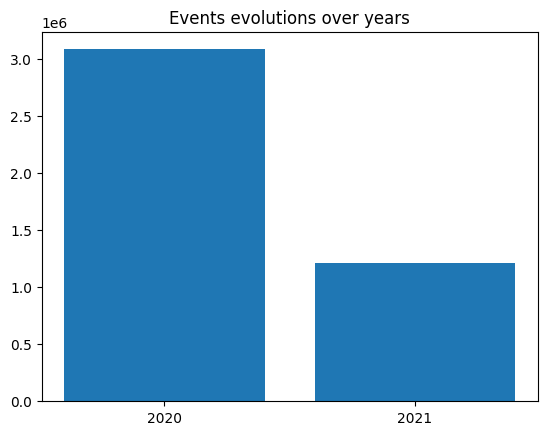

In [ ]:
years_series = pandas_df["event_date"].astype(str).str[:4]
count_y = years_series.value_counts().sort_index()
plt.bar(count_y.index, count_y.values)
plt.title("Events evolutions over years")

Text(0.5, 1.0, 'Events distribution over month')

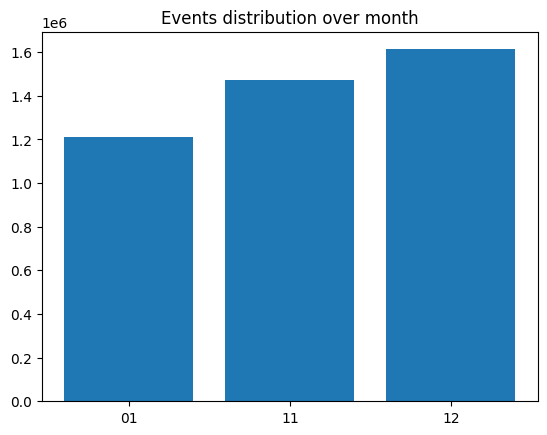

In [ ]:
months = pandas_df["event_date"].astype(str).str[4:6]
counts_m = months.value_counts().sort_index()
plt.bar(counts_m.index, counts_m.values)
plt.title("Events distribution over month")

Text(0.5, 1.0, 'Events evolutions over day of the month')

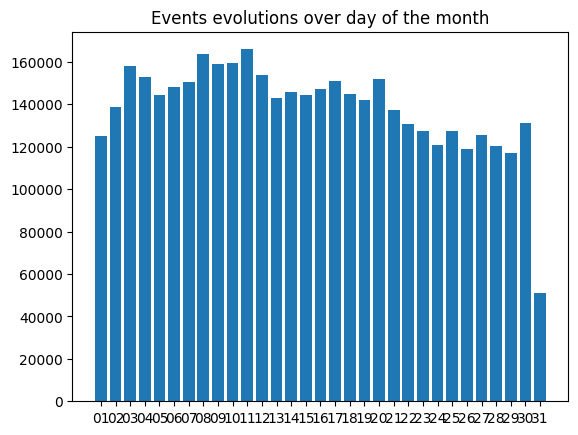

In [ ]:
days = pandas_df["event_date"].astype(str).str[6:]
count_day= days.value_counts().sort_index()
plt.bar(count_day.index, count_day.values)
plt.title("Events evolutions over day of the month")

In [ ]:
print(pandas_df["event_date"].value_counts().sort_index())

event_date
20201101    31272
20201102    48388
20201103    61672
20201104    51866
20201105    51952
            ...  
20210127    48665
20210128    43131
20210129    40877
20210130    30395
20210131    26489
Name: count, Length: 92, dtype: int64[pyarrow]


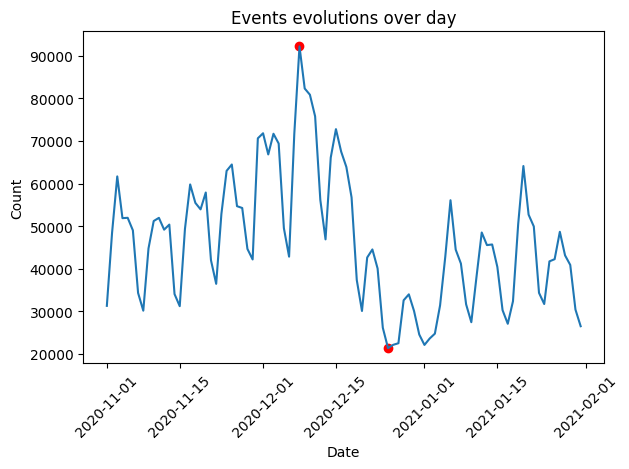

In [ ]:
dates = pd.to_datetime(pandas_df["event_date"].astype(str), format="%Y%m%d")
dates_counts = dates.dt.date.value_counts().sort_index()

plt.figure()
plt.xticks(rotation=45)
plt.plot(dates_counts.index, dates_counts.values)


dmax, vmax = dates_counts.idxmax(), dates_counts.max()
dmin, vmin = dates_counts.idxmin(), dates_counts.min()
plt.scatter([dmax], [vmax], color="red")
plt.scatter([dmin], [vmin], color="red")

plt.xlabel("Date"); plt.ylabel("Count"); plt.xticks(rotation=45); plt.title("Events evolutions over day")
plt.tight_layout(); plt.show()


In [ ]:
months.value_counts()

,count
event_date,
12,1612725
11,1472712
01,1210147


## Campaign analysis

In [ ]:
pandas_df["campaign"].unique()

<ArrowStringArray>
[       '(organic)',               <NA>,       '(referral)',
         '(direct)',   '(data deleted)',          '<Other>',
 'Data Share Promo',       'NewYear_V1',       'Holiday_V1',
   'BlackFriday_V2',       'Holiday_V2',       'NewYear_V2',
   'BlackFriday_V1']
Length: 13, dtype: string

In [ ]:
df_cp = pandas_df.copy()
df_cp["date"]= pd.to_datetime(df_cp["event_date"].astype(str), format="%Y%m%d")

span=(df_cp.dropna(subset=["date"]).groupby(df_cp["campaign"], as_index=False)["date"].agg(start="min", end="max"))
span

,campaign,start,end
0,(data deleted),2020-11-01,2021-01-31
1,(direct),2020-11-01,2021-01-31
2,(organic),2020-11-01,2021-01-31
3,(referral),2020-11-01,2021-01-31
4,<Other>,2020-11-01,2021-01-31
5,BlackFriday_V1,2020-11-27,2021-01-29
6,BlackFriday_V2,2020-11-27,2020-12-10
7,Data Share Promo,2020-11-01,2021-01-31
8,Holiday_V1,2020-12-10,2021-01-05
9,Holiday_V2,2020-12-10,2020-12-19


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['start']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'start'}, axis=1)
              .sort_values('start', ascending=True))
  xs = counted['start']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('start', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('start')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['end']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'end'}, axis=1)
              .sort_values('end', ascending=True))
  xs = counted['end']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('end', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('end')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_4['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

In [13]:
pandas_df["campaign"].value_counts()

,count
campaign,
(referral),844550
(organic),310072
(direct),136078
<Other>,115969
(data deleted),29123
Data Share Promo,2922
NewYear_V1,149
Holiday_V2,92
NewYear_V2,79


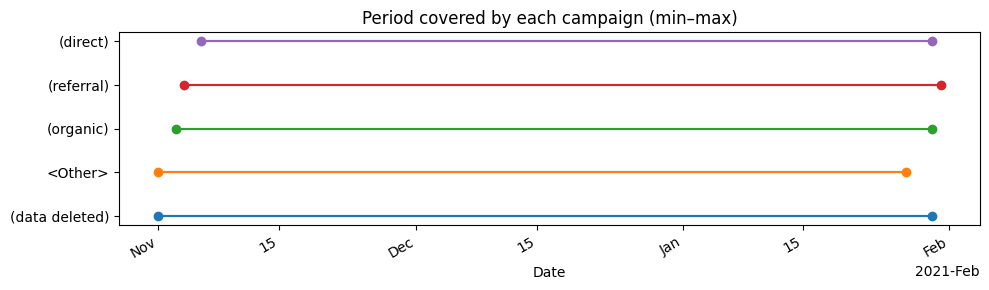

In [14]:
span = span.sort_values("start").reset_index(drop=True)
ypos = np.arange(len(span))

fig, ax = plt.subplots(figsize=(10, max(3, 0.4*len(span))))
for i, row in span.iterrows():
    ax.hlines(y=i, xmin=row["start"], xmax=row["end"])
    ax.plot([row["start"], row["end"]], [i, i], marker="o")


# plt.figure()
# plt.xticks(rotation=45)
# plt.plot(dates_counts.index, dates_counts.values)

ax.set_yticks(ypos)
ax.set_yticklabels(span["campaign"])
ax.set_xlabel("Date")
ax.set_title("Period covered by each campaign (min–max)")

loc = mdates.AutoDateLocator(minticks=8, maxticks=15)
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(loc))
fig.autofmt_xdate()

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Period covered by each campaign (min–max)')

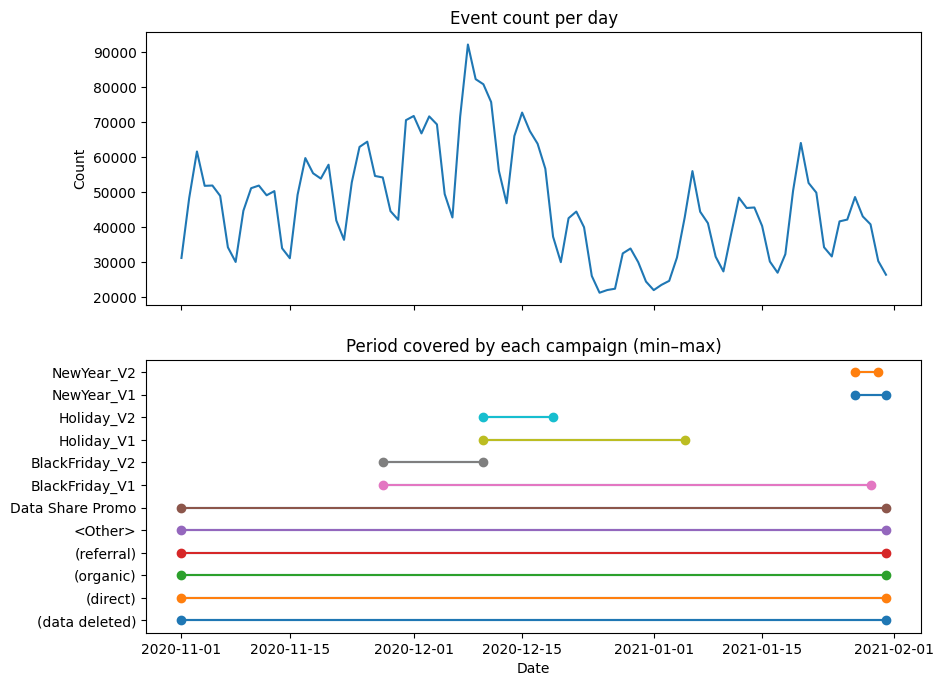

In [ ]:
df = pandas_df.copy()
df["date"] = pd.to_datetime(df["event_date"].astype(str), format="%Y%m%d", errors="coerce")

counts = df["date"].dt.date.value_counts().sort_index()
counts.index = pd.to_datetime(counts.index)

span = (df.dropna(subset=["date"])
          .groupby("campaign", as_index=False)["date"]
          .agg(start="min", end="max")
       ).sort_values("start").reset_index(drop=True)
span["start"] = pd.to_datetime(span["start"])
span["end"] = pd.to_datetime(span["end"])
ypos = np.arange(len(span))

fig, (ax1, ax2) = plt.subplots(
    nrows=2, ncols=1, sharex=True,
    figsize=(10, max(5, 0.4*len(span) + 3))
)

ax1.plot(counts.index, counts.values)
ax1.set_ylabel("Count")
ax1.set_title("Event count per day")

for i, row in span.iterrows():
    ax2.hlines(y=i, xmin=row["start"], xmax=row["end"])
    ax2.plot([row["start"], row["end"]], [i, i], marker="o")

ax2.set_yticks(ypos)
ax2.set_yticklabels(span["campaign"])
ax2.set_xlabel("Date")
ax2.set_title("Period covered by each campaign (min–max)")


In [ ]:
df1=dates_counts.values

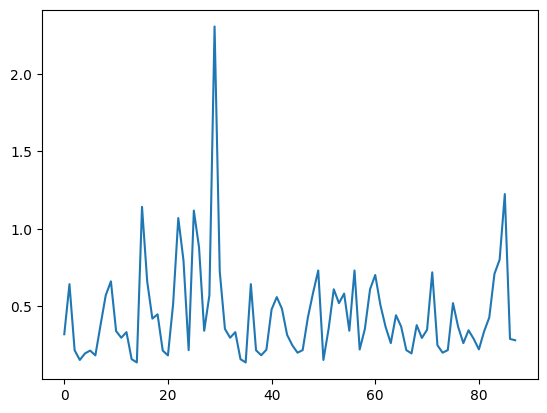

In [ ]:
w = 5
mp, mpi = matrixProfile.stomp(df1, w)

plt.plot(mp)
plt.show()

In [ ]:
mo, mod  = motifs.motifs(df1, (mp, mpi), max_motifs=5)

In [ ]:
mo

[[np.int64(14), 35],
 [3, np.int64(38), np.int64(50), np.int64(57), np.int64(73)],
 [np.int64(6), 20],
 [np.int64(45), np.int64(87)]]

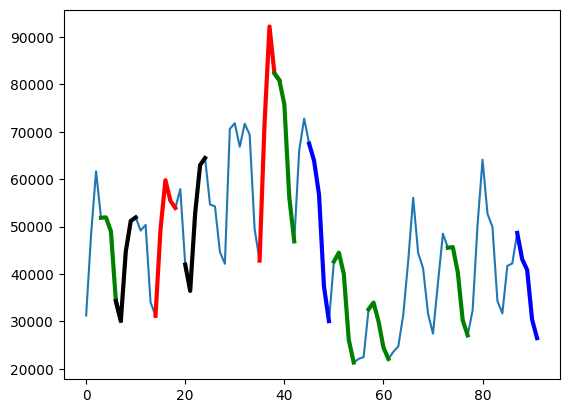

In [ ]:
plt.plot(df1)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = df1[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)

plt.show()

## Page location analysis

In [ ]:
pandas_df["page_location"].unique()

<ArrowStringArray>
[                                                     'https://shop.googlemerchandisestore.com/Google+Redesign/Apparel',
                                                                 'https://shop.googlemerchandisestore.com/asearch.html',
                                                                   'https://shop.googlemerchandisestore.com/store.html',
                                            'https://shop.googlemerchandisestore.com/Google+Redesign/Campus+Collection',
                       'https://shop.googlemerchandisestore.com/Google+Redesign/Accessories/Google+Mural+Sticker+Sheet',
                                                                                  'https://googlemerchandisestore.com/',
                                                 'https://shop.googlemerchandisestore.com/Google+Redesign/eco+friendly',
                                                 'https://shop.googlemerchandisestore.com/Google+Redesign/Apparel/Mens',
             

In [ ]:
text = "googlemerchandisestore.com"

mask = ~pandas_df["page_location"].str.contains(text, na=False, regex=False)
count = int(mask.sum())

print("not containing 'text':", count)


pandas_df_no = pandas_df.loc[mask]
print(pandas_df_no)

not containing 'text': 0
Empty DataFrame
Columns: [event_date, event_timestamp, event_name, user_pseudo_id, page_location, page_title, ga_session_id, session_engaged, source, medium, campaign, value_param, currency]
Index: []


## Purchase analysis

In [ ]:
pandas_df["event_name"].unique()

<ArrowStringArray>
[    'user_engagement',           'view_item',         'select_item',
           'page_view',         'first_visit',       'session_start',
              'scroll',      'view_promotion',      'begin_checkout',
         'add_to_cart', 'view_search_results',   'add_shipping_info',
    'add_payment_info',    'select_promotion',            'purchase',
               'click',      'view_item_list']
Length: 17, dtype: string

In [ ]:
pandas_df["event_name"].value_counts()

,count
event_name,
page_view,1350428
user_engagement,1058721
scroll,493072
view_item,386068
session_start,354970
first_visit,257462
view_promotion,190104
add_to_cart,58543
begin_checkout,38757


# Segmentation



In [45]:
purchases = (
    pandas_df.loc[pandas_df["event_name"].isin(["purchase","session_start"]), ["user_pseudo_id", "event_date"]]
    .assign(
        purchase_dt = pd.to_datetime(pandas_df.loc[pandas_df["event_name"] == "purchase", "event_date"].astype(str),
                                     format="%Y%m%d")
    )
)

last_purchase = (
    purchases
    .groupby("user_pseudo_id", as_index=False)
    .agg(first_purchase_date=("purchase_dt", "min"),
         last_purchase_date=("purchase_dt", "max"))
)

last_purchase["first_purchase_date"] = last_purchase["first_purchase_date"].dt.normalize()
last_purchase["last_purchase_date"]  = last_purchase["last_purchase_date"].dt.normalize()

last_purchase["days_since_last"] = (
    last_purchase["last_purchase_date"] - last_purchase["first_purchase_date"]
).dt.days

today = pd.Timestamp.utcnow().normalize()  # CURRENT_DATE() (uso UTC per coerenza)

conds = [
    last_purchase["first_purchase_date"] == today,                           # first_purchase_date = CURRENT_DATE()
    last_purchase["days_since_last"] <= 30,                                  # <= 30
    (last_purchase["days_since_last"] >= 31) & (last_purchase["days_since_last"] <= 60),  # 31..60
]
choices = ["New", "Active", "Dormant"]

last_purchase["segment"] = np.select(conds, choices, default="Lost")

segments = last_purchase[[
    "user_pseudo_id", "first_purchase_date", "last_purchase_date", "days_since_last", "segment"
]]

In [46]:
min(last_purchase["days_since_last"])

nan

In [40]:
segments

,user_pseudo_id,first_purchase_date,last_purchase_date,days_since_last,segment
0,10092926.3786306416,2021-01-22,2021-01-22,0,Active
1,10111055.8768683862,2020-12-10,2020-12-10,0,Active
2,1014825.0200289249,2020-11-03,2020-11-03,0,Active
3,1016446.8237887674,2020-12-21,2020-12-21,0,Active
4,10172849.5375293351,2020-12-09,2020-12-09,0,Active
...,...,...,...,...,...
4414,99387700.1672480666,2020-11-30,2020-12-08,8,Active
4415,9957205.7975202648,2020-12-10,2020-12-10,0,Active
4416,9963542.3978980993,2020-11-12,2020-12-10,28,Active
4417,99826321.7020196151,2021-01-25,2021-01-25,0,Active


In [47]:
segments["segment"].value_counts()

,count
segment,
Lost,262734
Active,4354
Dormant,58


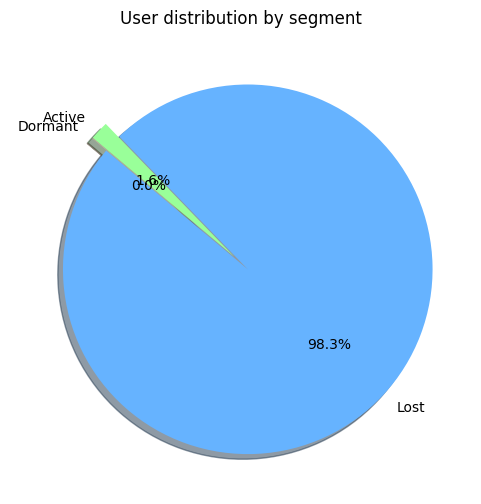

In [48]:
labels = segments["segment"].unique()
sizes = segments["segment"].value_counts().values

colors = ["#66b3ff", "#99ff99", "#ffcc99", "#ff9999"]

explode = [0.05] * len(sizes)

plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    colors=colors[:len(sizes)],  # prendi solo i colori necessari
    autopct="%1.1f%%",
    startangle=140,
    explode=explode,
    shadow=True
)

plt.title("User distribution by segment")
plt.show()


# only "purchase"


Text(0.5, 1.0, 'Period covered by each campaign (min–max)')

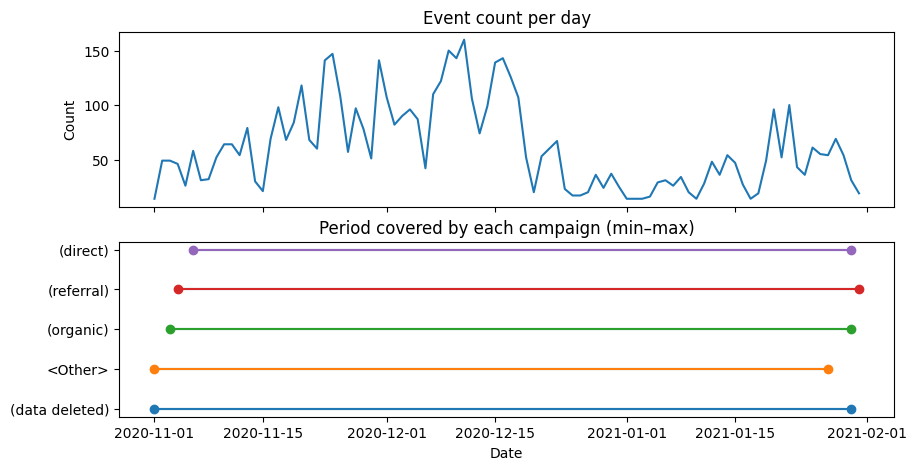

In [12]:
df1 = pandas_df[pandas_df["event_name"]== "purchase"].copy()
df1["date"] = pd.to_datetime(df1["event_date"].astype(str), format="%Y%m%d", errors="coerce")

counts = df1["date"].dt.date.value_counts().sort_index()
counts.index = pd.to_datetime(counts.index)  # assicura datetime64[ns]

span = (df1.dropna(subset=["date"])
          .groupby("campaign", as_index=False)["date"]
          .agg(start="min", end="max")
       ).sort_values("start").reset_index(drop=True)
span["start"] = pd.to_datetime(span["start"])
span["end"] = pd.to_datetime(span["end"])
ypos = np.arange(len(span))

fig, (ax1, ax2) = plt.subplots(
    nrows=2, ncols=1, sharex=True,
    figsize=(10, max(5, 0.4*len(span) + 3))
)

ax1.plot(counts.index, counts.values)
ax1.set_ylabel("Count")
ax1.set_title("Event count per day")

for i, row in span.iterrows():
    ax2.hlines(y=i, xmin=row["start"], xmax=row["end"])
    ax2.plot([row["start"], row["end"]], [i, i], marker="o")

ax2.set_yticks(ypos)
ax2.set_yticklabels(span["campaign"])
ax2.set_xlabel("Date")
ax2.set_title("Period covered by each campaign (min–max)")